In [1]:
data_root = "C:\\Users\\Abhijeet\\Documents\\GitHub\\computervision\\origpb\\the_original_problem\\data\\data"

In [2]:
import os

In [3]:
os.listdir(data_root)

['.DS_Store', 'easy', 'hard', 'medium_1', 'medium_2']

In [4]:
X = []
diff = []
y = []
for f in os.listdir(data_root):
    difficulty = os.path.abspath(os.path.join(data_root , f))
    if os.path.isdir(difficulty):
        for classType in os.listdir(difficulty):
            image_group_path = os.path.abspath(os.path.join(difficulty, classType))
            if os.path.isdir(image_group_path):
                for image_path in os.listdir(image_group_path):
                    if image_path.find(".jpg") > -1:
                        image_path_comp =  os.path.abspath(os.path.join(difficulty,classType, image_path))
                        X.append(image_path_comp)
                        diff.append(f)
                        y.append(classType)

In [5]:
import pandas as pd

In [6]:
image_df = pd.DataFrame({"path" : X , "diff":diff , "label":y})

In [7]:
image_df.head()

,path,diff,label
0,C:\Users\Abhijeet\Documents\GitHub\computervis...,easy,ball
1,C:\Users\Abhijeet\Documents\GitHub\computervis...,easy,ball
2,C:\Users\Abhijeet\Documents\GitHub\computervis...,easy,ball
3,C:\Users\Abhijeet\Documents\GitHub\computervis...,easy,ball
4,C:\Users\Abhijeet\Documents\GitHub\computervis...,easy,ball


In [8]:
from matplotlib.pyplot import *

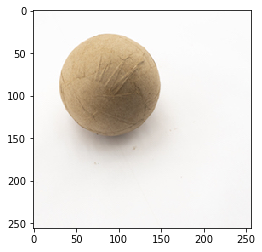

In [9]:
im = imread(image_df.loc[0,"path"])
imshow(im)

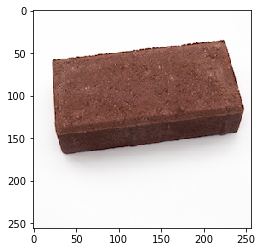

In [10]:
im = imread(image_df.loc[10,"path"])
imshow(im)

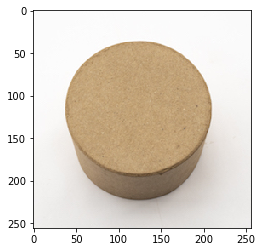

In [11]:
im = imread(image_df[image_df["label"] == "cylinder"].iloc[0]["path"])
imshow(im)

In [12]:
from scipy.signal import convolve2d

In [13]:
im.shape

(256, 256, 3)

In [14]:
import numpy as np
from plotnine import *

In [15]:
np.mean(im , axis=2).shape

(256, 256)

In [16]:
def img_to_grey(im):
    return np.mean(im/255. , axis=2)

In [17]:
def plotImg(im):
    print(imshow(im , cmap = 'gray'))

In [18]:
def apply_kernel(im , kernel , plot=False):
    if len(im.shape) > 2:
        im = img_to_grey(im)
    cv = convolve2d(im,kernel)
    if plot:
        plotImg(cv)
    return cv

In [19]:
def chain_kernels(im , kernels , plot=False):
    for k in kernels:
        im = apply_kernel(im,k)
    if plot:
        plotImg(im)
    return im

In [20]:
kernels = {
    "blur" : [[2,2,2] , [1,1,1] , [1,1,1]]
    ,"vertical" : [[-1,0,1],[-1,0,1],[-1,0,1]]
}

AxesImage(54,36;334.8x217.44)


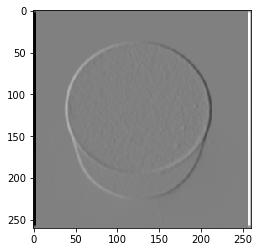

In [21]:
cv = chain_kernels(im , [kernels["blur"] , kernels["vertical"]] , True)

In [22]:
cv.reshape(1,-1)[0]

array([-1.96862745, -3.9372549 , -3.9372549 , ...,  1.84313725,
        1.84313725,  0.92156863])

In [23]:
Kx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Ky = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

Gx = apply_kernel(im , Kx)
Gy = apply_kernel(im , Ky)
G = np.sqrt(Gx**2+Gy**2)

AxesImage(54,36;334.8x217.44)


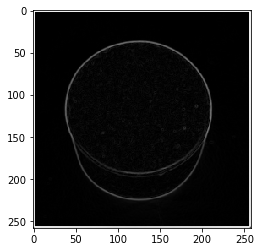

In [24]:
plotImg(G)

AxesImage(54,36;334.8x217.44)


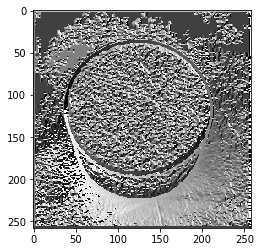

In [25]:
G_direction = np.arctan2(Gy, Gx)
plotImg(G_direction)

In [26]:
thresh = 1.13

edges_and_angles = np.zeros(G.shape)*np.NaN #Create empty array of NaNs
#Replace pixels with gradient estimates above thresh with the direction of the gradient estimate:
edges_and_angles[G>thresh] = G_direction[G>thresh] 

AxesImage(54,36;334.8x217.44)


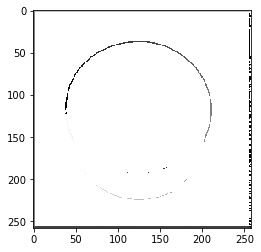

In [27]:
plotImg(edges_and_angles)

In [28]:
edges_and_angles.flatten()

array([ 0.78539816,  1.24904577,  1.57079633, ..., -1.57079633,
       -1.89254688, -2.35619449])

In [29]:
pd.DataFrame({"tan" : edges_and_angles.flatten()}).describe()

,tan
count,2.631000e+03
mean,-9.502137e-02
std,1.904087e+00
min,-3.141593e+00
25%,-1.570796e+00
50%,-5.639579e-17
75%,1.570796e+00
max,3.141593e+00


In [33]:
np.argwhere(~np.isnan(edges_and_angles))

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [257, 255],
       [257, 256],
       [257, 257]], dtype=int64)

In [34]:
np.bincount(np.digitize(edges_and_angles.flatten() , [np.pi*i for i in range(-4,4)]))

array([    0,     0,     0,     0,  1390,  1098,   143,     0, 63933],
      dtype=int64)

In [35]:
import math

In [59]:
def continuityTest(arr ,error_margin=5):
    final = []
    i = 0
    
    while i < len(arr):
        
        while  (i+1 < len(arr)) and (abs(arr[i+1]-arr[i]) < error_margin):
            i+=1
        final.append(arr[i])
        
        i +=1
        
    return len(final) == 3
            

In [479]:
def directional_kernal(im , thresh ):
#     Kx = np.array([[1,2,0],[-2,0,-2],[0,-2,-1]])
#     Ky = np.array([[0,2,1],[-2,0,2],[-1,-2,0]])
    Kx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

    Ky = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])
    Gx = apply_kernel(im , Kx)
    Gy = apply_kernel(im , Ky)
    G = np.sqrt(Gx**2+Gy**2) 
    G_direction = np.arctan2(Gy, Gx)

    edges_and_angles = np.zeros(G.shape)*np.nan #Create empty array of NaNs
    #Replace pixels with gradient estimates above thresh with the direction of the gradient estimate:
    edges_and_angles[G>thresh] = G_direction[G>thresh]
    pad = 5
    edges_and_angles[:pad , : ] = np.nan
    edges_and_angles[-pad: , : ] = np.nan
    edges_and_angles[: , -pad : ] = np.nan
    edges_and_angles[: , :pad ] = np.nan
    return edges_and_angles

def im_pipe(im , thresh=0.6 , tann=5 , error_margin=25, error_pct=0.5):
#     Kx = np.array([[1, 0, -1],
#                [2, 0, -2],
#                [1, 0, -1]])

#     Ky = np.array([[1, 2, 1],
#                    [0, 0, 0],
#                    [-1, -2, -1]])
    im = img_to_grey(im)
    
    while True:
        im2 = directional_kernal(im,thresh)
        indices = np.argwhere(~np.isnan(im2))
        print(indices.shape , thresh)
        if indices.shape[0] == 0:
            thresh -= 0.1
        else:
            break
    
    im = im2
    #print(indices)
    ymin = np.min(indices[:,0])
    ymax = np.max(indices[:,0])
    xmin = np.min(indices[:,1])
    xmax = np.max(indices[:,1])
    
    tans = np.bincount(np.digitize(im.flatten() , [i for i in np.linspace(-np.pi,np.pi, tann)]))
    tans = tans[1:-1]
    #ret = pd.Series(edges_and_angles.flatten()).quantile(np.linspace(0,1,20))
    inbetweens = [ math.floor(i) for i in np.linspace((xmax-xmin)/3 , (2/3)*(xmax-xmin) , 100)]
    contin = np.array([continuityTest( np.argwhere(~np.isnan(im[:,i])) , error_margin) for i in inbetweens])
    contin = len(contin[contin == True]) > error_pct*len(contin)
    #contin = np.maxcontin[0] and contin[1]
    
    
    tstd = np.std(tans)
    d1 = math.sqrt((xmin-xmax)**2 + (ymin-ymax)**2)
    lx = (xmax-xmin)
    ly = (ymax-ymin)
    sqra = lx/ly
    ret = [d1,lx,ly,sqra,contin ,tstd]
    ret.extend(tans)
    
    return pd.Series(ret , index=["diag" , "lx" , "ly" , "sqra" , "contin" , "tstd"] + [f"t{i}" for i in range(len(tans))] )


def predict2(row,cols,**kwargs):
    
    row = pd.Series(row , index=cols)

    pred = ''
    if (row["tstd"] > kwargs["tstd"]):
        pred ='brick'
    elif (row['contin'] == False) and (row['tstd'] < kwargs["tstd"]):
        pred =  'ball'
    #elif (row["t2"] > 100):
    #    pred = 'brick'
    else:
        pred = 'cylinder'
    return np.array(pred , object)


def eval(diff ,fdf, predict=predict2 ,**kwargs):
    f = fdf[fdf["diff"] ==diff].drop(["label"  , "diff"], axis=1)
    predictions = np.apply_along_axis(lambda row : predict(row,f.columns , **kwargs)
                                  ,1
                                  ,f)
    score = accuracy_score(image_df[image_df["diff"] == diff]["label"] , predictions)
    return score



def im_pipe_eval(X, thresh=0.6 , tann=5 , error_margin=25, error_pct=0.5 , tstd=100):
   #X = image_df.apply(lambda row : im_pipe(load_img(row["path"]) , thresh, tann, error_margin, error_pct) , axis=1)
    kwargs = dict(tstd = tstd)
    X = X.apply(lambda row : im_pipe(row , thresh, tann, error_margin, error_pct ) )
    fdf = pd.DataFrame(X)
    fdf["label"] = image_df["label"]
    fdf["diff"]= image_df["diff"]
    cols = fdf.drop(["label"  , "diff"], axis=1).columns
    v = np.apply_along_axis(lambda row : predict2(row,cols , **kwargs)
                                  ,1
                                  ,fdf.drop(["label"  , "diff"], axis=1))
    
    score = np.sum([eval(n,fdf , **kwargs)*w for n,w in [("easy" , 0.5) , ("medium_1",0.2) , ("medium_2",0.2), ("hard",0.1)]])
    
    predf = pd.DataFrame({"label"  : image_df["label"] , "pred":v , "diff" :image_df["diff"]})
    predf.groupby("diff").apply(lambda df : print(df.name,confusion_matrix(df["label"] , df["pred"])))
    print(confusion_matrix(image_df["label"] , v , labels=base_line.index))
    print(score)
    return fdf

In [415]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [416]:
X = image_df.apply(lambda row : load_img(row["path"]) , axis=1)

In [480]:
interact(im_pipe_eval 
         , X = fixed(X)
         , thresh=widgets.FloatSlider(min=0.1,max=1.5 ,step= 0.05) 
         , tann=widgets.IntSlider(min=4,max=10) 
         , error_margin=widgets.IntSlider(min=5,max=100 , step=5)
        , error_pct = widgets.FloatSlider(min=0,max=1 , step=0.1))

interactive(children=(FloatSlider(value=0.1, description='thresh', max=1.5, min=0.1, step=0.05), IntSlider(val…

<function __main__.im_pipe_eval(X, thresh=0.6, tann=5, error_margin=25, error_pct=0.5, tstd=100)>

In [437]:
pdf = im_pipe_eval(X , 0.6,4,50,0)
pdf

[[11 12  2]
 [ 2 20  2]
 [ 5 10  5]]
0.5632154882154883


,diag,lx,ly,sqra,contin,tstd,t0,t1,t2,label,diff
0,164.146276,120,112,1.071429,False,52.618121,231,206,109,ball,easy
1,188.798835,133,134,0.992537,False,58.846316,257,236,123,ball,easy
2,250.233891,164,189,0.867725,False,74.569878,335,277,156,ball,easy
3,255.266527,180,181,0.994475,True,21.822516,355,312,361,ball,easy
4,170.660482,127,114,1.114035,False,69.013686,278,197,109,ball,easy
...,...,...,...,...,...,...,...,...,...,...,...
64,335.466839,227,247,0.919028,True,157.705069,1045,722,700,brick,medium_2
65,213.490047,187,103,1.815534,False,96.253138,173,39,274,brick,medium_2
66,109.480592,85,69,1.231884,False,35.873234,88,77,7,cylinder,medium_2
67,157.813181,116,107,1.084112,False,45.755388,114,118,213,cylinder,medium_2


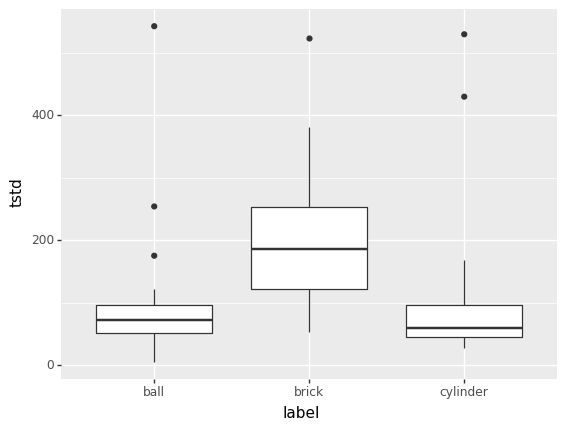

<ggplot: (-9223371882772847493)>

In [439]:
(
    ggplot(pdf[pdf["diff"].isin(["easy" , "medium_1" , "medium_2"])] , aes(x="label" , y="tstd"))
    + geom_boxplot()
)

In [241]:
im.shape

(256, 256)

In [242]:
edges_and_angles

array([[ 7.85398163e-01,  1.24904577e+00,  1.57079633e+00, ...,
         1.56979332e+00,  1.89174560e+00,  2.35619449e+00],
       [ 3.21750554e-01,  7.85398163e-01,  1.57179334e+00, ...,
         1.56779333e+00,  2.35485938e+00,  2.81984210e+00],
       [-9.97008643e-04, -2.99101800e-03,             nan, ...,
                    nan,  3.14059165e+00,  3.14159265e+00],
       ...,
       [-1.04858403e-03, -2.09496900e-03,             nan, ...,
                    nan,  3.14053221e+00,  3.14052769e+00],
       [-3.22590655e-01, -7.85398163e-01, -1.56870136e+00, ...,
        -1.57079633e+00, -2.35619449e+00, -2.81984210e+00],
       [-7.85398163e-01, -1.24820567e+00, -1.56974774e+00, ...,
        -1.57079633e+00, -1.89254688e+00, -2.35619449e+00]])

In [243]:
im = imread(image_df[image_df["label"] == "cylinder"].iloc[5]["path"])
im = img_to_grey(im)
im = directional_kernal(im , 0.5)
indices = np.argwhere(~np.isnan(im))
xmin = np.min(indices[:,0])
xmax = np.max(indices[:,0])
ymin = np.min(indices[:,1])
ymax = np.max(indices[:,1])
print(xmin,xmax , ymin,ymax)



44 229 56 223


In [244]:
continuityTest([1,100,56])

True

In [245]:
continuityTest([1,2,4,5,6,7,8,100,110,101,104,105,56])

False

In [246]:
density_error = 5
coli = math.floor((xmax-xmin)/2)
inbetween = np.argwhere(~np.isnan(im[:,coli]))[:,0]
inbetween

array([ 53,  54, 146, 147, 216, 217], dtype=int64)

In [449]:
im = imread(image_df[image_df["label"] == "cylinder"].iloc[5]["path"])
im = img_to_grey(im)
interact(lambda thresh : imshow(directional_kernal(im , thresh)) , thresh=widgets.FloatSlider(min=0 , max=2 , step=0.01))

interactive(children=(FloatSlider(value=0.0, description='thresh', max=2.0, step=0.01), Output()), _dom_classe…

<function __main__.<lambda>(thresh)>

In [421]:
im = imread(image_df[image_df["label"] == "brick"].iloc[5]["path"])
im = img_to_grey(im)
interact(lambda thresh : imshow(directional_kernal(im , thresh)) , thresh=widgets.FloatSlider(min=0 , max=2 , step=0.01))

interactive(children=(FloatSlider(value=0.0, description='thresh', max=2.0, step=0.01), Output()), _dom_classe…

<function __main__.<lambda>(thresh)>

In [422]:
im = imread(image_df[image_df["label"] == "ball"].iloc[5]["path"])
im = img_to_grey(im)
interact(lambda thresh : imshow(directional_kernal(im , thresh)) , thresh=widgets.FloatSlider(min=0 , max=2 , step=0.01))

interactive(children=(FloatSlider(value=0.0, description='thresh', max=2.0, step=0.01), Output()), _dom_classe…

<function __main__.<lambda>(thresh)>

In [250]:
from PIL import Image  
def load_img(path):
    im  = Image.open(path)
    return np.array(im.resize((256,256 )))

In [358]:
X = image_df.apply(lambda row : im_pipe(load_img(row["path"]) , 0.5) , axis=1)
#X = X.fillna(-5)

In [359]:
X

,diag,lx,ly,sqra,contin,t0,t1,t2,t3,t4,t5
0,181.372545,120,136,0.882353,False,0,235,194,122,129,65884
1,210.375854,133,163,0.815951,False,0,286,220,149,150,65759
2,250.233891,164,189,0.867725,False,0,358,271,208,180,65547
3,255.266527,180,181,0.994475,False,0,373,296,320,295,65280
4,196.542616,127,150,0.846667,False,0,298,234,120,137,65775
...,...,...,...,...,...,...,...,...,...,...,...
64,336.144314,228,247,0.923077,False,0,1071,837,840,935,62881
65,215.334623,188,105,1.790476,False,0,192,10,110,284,65968
66,121.696343,89,83,1.072289,False,0,124,72,57,21,66290
67,158.492902,116,108,1.074074,False,0,139,2,205,213,66005


In [360]:
fdf = pd.DataFrame(X)
#fdf = fdf.apply(lambda row : row /row.sum() , axis=1)

In [361]:
fdf

,diag,lx,ly,sqra,contin,t0,t1,t2,t3,t4,t5
0,181.372545,120,136,0.882353,False,0,235,194,122,129,65884
1,210.375854,133,163,0.815951,False,0,286,220,149,150,65759
2,250.233891,164,189,0.867725,False,0,358,271,208,180,65547
3,255.266527,180,181,0.994475,False,0,373,296,320,295,65280
4,196.542616,127,150,0.846667,False,0,298,234,120,137,65775
...,...,...,...,...,...,...,...,...,...,...,...
64,336.144314,228,247,0.923077,False,0,1071,837,840,935,62881
65,215.334623,188,105,1.790476,False,0,192,10,110,284,65968
66,121.696343,89,83,1.072289,False,0,124,72,57,21,66290
67,158.492902,116,108,1.074074,False,0,139,2,205,213,66005


In [362]:
#fdf = fdf.drop("count" , axis=1)

In [363]:
fdf["label"] = image_df["label"]
fdf["diff"]= image_df["diff"]

In [364]:
fdf

,diag,lx,ly,sqra,contin,t0,t1,t2,t3,t4,t5,label,diff
0,181.372545,120,136,0.882353,False,0,235,194,122,129,65884,ball,easy
1,210.375854,133,163,0.815951,False,0,286,220,149,150,65759,ball,easy
2,250.233891,164,189,0.867725,False,0,358,271,208,180,65547,ball,easy
3,255.266527,180,181,0.994475,False,0,373,296,320,295,65280,ball,easy
4,196.542616,127,150,0.846667,False,0,298,234,120,137,65775,ball,easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,336.144314,228,247,0.923077,False,0,1071,837,840,935,62881,brick,medium_2
65,215.334623,188,105,1.790476,False,0,192,10,110,284,65968,brick,medium_2
66,121.696343,89,83,1.072289,False,0,124,72,57,21,66290,cylinder,medium_2
67,158.492902,116,108,1.074074,False,0,139,2,205,213,66005,cylinder,medium_2


In [365]:
fdf.groupby("label").apply(lambda df : df["contin"].sum()/df.shape[0])

label
ball        0.040000
brick       0.083333
cylinder    0.400000
dtype: float64

In [353]:
fdf.melt(id_vars=["label" , "diff"])

,label,diff,variable,value
0,ball,easy,diag,181.373
1,ball,easy,diag,210.376
2,ball,easy,diag,250.234
3,ball,easy,diag,255.267
4,ball,easy,diag,196.543
...,...,...,...,...
754,brick,medium_2,t5,62881
755,brick,medium_2,t5,65968
756,cylinder,medium_2,t5,66290
757,cylinder,medium_2,t5,66005


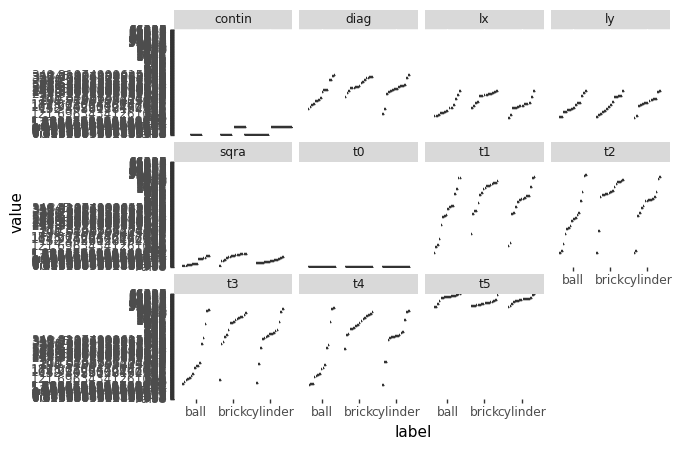

<ggplot: (-9223371882905732920)>

In [329]:
tempdf = fdf.melt(id_vars=["label" , "diff"])

(
    ggplot(tempdf[tempdf["diff"].isin(["easy" , "medium_1" , "medium_2"])] 
           , aes(x="label" ,y="value" ))
    + geom_boxplot()
    + facet_wrap("~ variable")
)

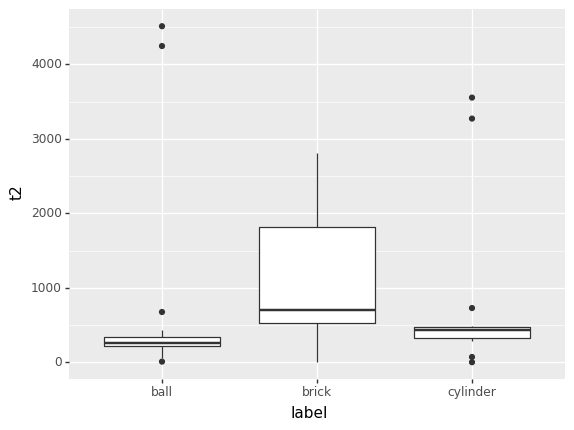

<ggplot: (-9223371882900328476)>

In [354]:
(
    ggplot(fdf[fdf["diff"].isin(["easy" , "medium_1" , "medium_2"])] 
           , aes(x="label" ,y="t2" ))
    + geom_boxplot()
)

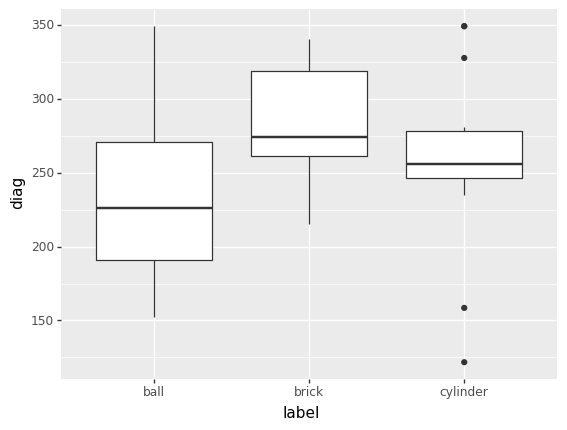

<ggplot: (-9223371882776687970)>

In [265]:
(
    ggplot(fdf[fdf["diff"].isin(["easy" , "medium_1" , "medium_2"])] 
           , aes(x="label" ,y="diag" ))
    + geom_boxplot()
)

In [342]:
base_line = fdf.groupby("label").mean()

In [343]:
base_line

,diag,lx,ly,sqra,contin,t0,t1,t2,t3,t4,t5
label,,,,,,,,,,,
ball,277.276904,192.760000,198.840000,0.968083,0.000,0.0,1441.760,1568.160,1440.960000,1564.600000,60548.520000
brick,306.462650,227.958333,201.916667,1.200318,0.125,0.0,1689.875,1744.375,1548.541667,1750.041667,59831.166667
cylinder,281.325275,194.900000,202.650000,0.963796,0.500,0.0,1253.850,1242.250,1242.150000,1290.950000,61534.800000


In [113]:
# base_line = base_line.apply(lambda col : col / col.sum())
# base_line

In [114]:
from numpy.linalg import norm

def distance(row , base):
    return np.sqrt(np.sum((row-base)**2))

def cosineDist(row,base):
    return 1- np.dot(row, base)/(norm(row)*norm(base))

In [339]:
def predict2(row):
    
    row = pd.Series(row , index=fdf.drop(["label"  , "diff"], axis=1).columns)
    pred = ''
    if (row['contin'] == False) and (row['t2'] < 500):
        pred =  'ball'
    elif (row["t2"] > 500):
        pred = 'brick'
    else:
        pred = 'cylinder'
    return np.array(pred , object)

In [144]:
def predict(row):
    return base_line.index[np.argmin([cosineDist(row , base_line.iloc[0])
     ,cosineDist(row, base_line.iloc[1])
     ,cosineDist(row, base_line.iloc[2])])]

In [145]:
base_line.index

Index(['ball', 'brick', 'cylinder'], dtype='object', name='label')

In [263]:
fdf.drop(["label"  , "diff"], axis=1)

,diag,lx,ly,sqra,contin
0,181.372545,120,136,0.882353,False
1,210.375854,133,163,0.815951,False
2,250.233891,164,189,0.867725,False
3,255.266527,180,181,0.994475,False
4,196.542616,127,150,0.846667,False
...,...,...,...,...,...
64,336.144314,228,247,0.923077,False
65,215.334623,188,105,1.790476,False
66,121.696343,89,83,1.072289,False
67,158.492902,116,108,1.074074,False


In [120]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [188]:
def eval(diff , predict=predict2):
    predictions = np.apply_along_axis(lambda row : predict(row)
                                  ,1
                                  ,fdf[fdf["diff"] ==diff].drop(["label"  , "diff"], axis=1))
    score = accuracy_score(image_df[image_df["diff"] == diff]["label"] , predictions)
    return score

In [337]:
v = np.apply_along_axis(lambda row : predict2(row)
                                  ,1
                                  ,fdf.drop(["label"  , "diff"], axis=1))
v

array(['ball', 'ball', 'ball', 'ball', 'ball', 'ball', 'ball', 'ball',
       'ball', 'brick', 'brick', 'cylinder', 'brick', 'brick', 'brick',
       'brick', 'brick', 'brick', 'cylinder', 'cylinder', 'ball',
       'cylinder', 'cylinder', 'cylinder', 'cylinder', 'cylinder',
       'cylinder', 'brick', 'brick', 'brick', 'brick', 'brick', 'brick',
       'brick', 'brick', 'brick', 'brick', 'brick', 'brick', 'brick',
       'brick', 'brick', 'brick', 'brick', 'brick', 'brick', 'brick',
       'brick', 'brick', 'ball', 'ball', 'brick', 'brick', 'brick',
       'brick', 'brick', 'brick', 'brick', 'cylinder', 'brick', 'brick',
       'ball', 'brick', 'ball', 'brick', 'ball', 'ball', 'ball', 'brick'],
      dtype=object)

In [340]:
eval("easy")*0.5 + eval("medium_1")*0.2 + eval("medium_2")*0.2 + eval("hard")*0.1

0.37803030303030305

In [341]:
confusion_matrix(y , v , labels=base_line.index)

array([[13, 12,  0],
       [ 1, 22,  1],
       [ 3,  8,  9]], dtype=int64)

In [ ]:
(
    ggplot( fdf.melt(id_vars="label")
           ,aes(x="variable" , y="value" , fill="label"))
    + geom_col(position="dodge")
)

In [ ]:
tdf = fdf.melt(id_vars="label")
(
    ggplot(
        tdf
        ,aes(x="variable" ,y="value"))
    + geom_col(aes(fill="label"), position="fill")
)

In [ ]:
tdf.groupby("label").apply(lambda df : )

In [ ]:
fdf.groupby("label").apply(lambda df : df.apply(lambda col : (col != 0).sum().mean()))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train,y_test = train_test_split(X,y, stratify=image_df["label"] , train_size=0.5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(y_train , rfc.predict(X_train))

In [ ]:
accuracy_score(y_test , rfc.predict(X_test))

In [ ]:
confusion_matrix(y_test , rfc.predict(X_test))